### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Load data

In [2]:
df = pd.read_csv("broad_reddit_search_with_labels.csv")

In [3]:
df.head()

,title,post_body,comment_body,comment_score,post_url,created,subreddit,label,post_score,post_num_comments,...,author_premium,distinguished,all_awardings,num_crossposts,total_awards_received,post_thumbnail,link_flair_text,post_id,comment_id,author_flair_text
0,I don't know what's wrong with me,I'm finding it really hard to keep myself toge...,Have you got a therapist on board? Sounds like...,2,https://www.reddit.com/r/mentalhealth/comments...,1.730484e+09,mentalhealth,mental_health_issue,1,1,...,False,NaN,[],0,0,self,Venting,1ghb2bs,luw5fgj,NaN
1,Friends who distance themselves from you or cu...,Please tell me if I sound entitled or selfish....,"I think it’s a combination of factors, and I s...",2,https://www.reddit.com/r/mentalhealth/comments...,1.730480e+09,mentalhealth,mental_health_issue,1,1,...,False,NaN,[],0,0,self,Venting,1gh9prb,luvspbv,NaN
2,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,"When I have a panic attack, I tend to think th...",1,https://www.reddit.com/r/mentalhealth/comments...,1.730486e+09,mentalhealth,mental_health_issue,2,2,...,False,NaN,[],0,0,self,Venting,1gh98yg,luwcwu7,NaN
3,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,Im wondering if it was simply a panic attack. ...,2,https://www.reddit.com/r/mentalhealth/comments...,1.730487e+09,mentalhealth,mental_health_issue,2,2,...,False,NaN,[],0,0,self,Venting,1gh98yg,luwep2n,NaN
4,Need objective support. I’m in over my head,I feel in over my head and I’m not sure what t...,Please consider seeing a psychologist. Good luck!,1,https://www.reddit.com/r/mentalhealth/comments...,1.730477e+09,mentalhealth,mental_health_issue,1,4,...,False,NaN,[],0,0,self,Need Support,1gh8q6w,luvir86,NaN


### Exploratory Data Analysis

In [4]:
df.shape

(92395, 27)

In [5]:
df.columns

Index(['title', 'post_body', 'comment_body', 'comment_score', 'post_url',
       'created', 'subreddit', 'label', 'post_score', 'post_num_comments',
       'author', 'comment_author', 'post_created', 'post_flair',
       'upvote_ratio', 'over_18', 'is_self_post', 'author_premium',
       'distinguished', 'all_awardings', 'num_crossposts',
       'total_awards_received', 'post_thumbnail', 'link_flair_text', 'post_id',
       'comment_id', 'author_flair_text'],
      dtype='object')

In [6]:
df.describe()

,comment_score,created,post_score,post_num_comments,post_created,upvote_ratio,distinguished,num_crossposts,total_awards_received
count,92395.000000,9.239500e+04,92395.000000,92395.000000,9.239500e+04,92395.000000,0.0,92395.000000,92395.0
mean,13.769403,1.716089e+09,4843.402468,294.855955,1.716041e+09,0.864621,NaN,0.529401,0.0
std,129.183400,2.430551e+07,14386.577006,399.616407,2.432998e+07,0.172151,NaN,1.993058,0.0
min,-550.000000,1.654815e+09,0.000000,1.000000,1.654815e+09,0.060000,NaN,0.000000,0.0
25%,1.000000,1.726120e+09,26.000000,43.000000,1.726107e+09,0.840000,NaN,0.000000,0.0
50%,2.000000,1.728860e+09,193.000000,139.000000,1.728828e+09,0.930000,NaN,0.000000,0.0
75%,4.000000,1.730050e+09,1109.000000,389.000000,1.730029e+09,0.970000,NaN,0.000000,0.0
max,12680.000000,1.730494e+09,86196.000000,2523.000000,1.730493e+09,1.000000,NaN,20.000000,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92395 entries, 0 to 92394
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  92395 non-null  object 
 1   post_body              63730 non-null  object 
 2   comment_body           92395 non-null  object 
 3   comment_score          92395 non-null  int64  
 4   post_url               92395 non-null  object 
 5   created                92395 non-null  float64
 6   subreddit              92395 non-null  object 
 7   label                  92395 non-null  object 
 8   post_score             92395 non-null  int64  
 9   post_num_comments      92395 non-null  int64  
 10  author                 92395 non-null  object 
 11  comment_author         92395 non-null  object 
 12  post_created           92395 non-null  float64
 13  post_flair             35211 non-null  object 
 14  upvote_ratio           92395 non-null  float64
 15  ov

In [8]:
df.isnull().sum()

title                        0
post_body                28665
comment_body                 0
comment_score                0
post_url                     0
created                      0
subreddit                    0
label                        0
post_score                   0
post_num_comments            0
author                       0
comment_author               0
post_created                 0
post_flair               57184
upvote_ratio                 0
over_18                      0
is_self_post                 0
author_premium               0
distinguished            92395
all_awardings                0
num_crossposts               0
total_awards_received        0
post_thumbnail               0
link_flair_text          57184
post_id                      0
comment_id                   0
author_flair_text        87880
dtype: int64

In [9]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({"count" : missing_values, "percentage" : missing_percentage})
missing_data = missing_data[missing_data["count"] > 0].sort_values(by="percentage", ascending=False)
print(missing_data)

                   count  percentage
distinguished      92395  100.000000
author_flair_text  87880   95.113372
post_flair         57184   61.890795
link_flair_text    57184   61.890795
post_body          28665   31.024406


In [10]:
columns_to_drop = missing_data[missing_data["percentage"] > 50].index
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
df["post_body"].fillna("Unknown", inplace=True)


In [12]:
df.isnull().sum()

title                    0
post_body                0
comment_body             0
comment_score            0
post_url                 0
created                  0
subreddit                0
label                    0
post_score               0
post_num_comments        0
author                   0
comment_author           0
post_created             0
upvote_ratio             0
over_18                  0
is_self_post             0
author_premium           0
all_awardings            0
num_crossposts           0
total_awards_received    0
post_thumbnail           0
post_id                  0
comment_id               0
dtype: int64

### Visualizations

Distribution of Numerical Variables

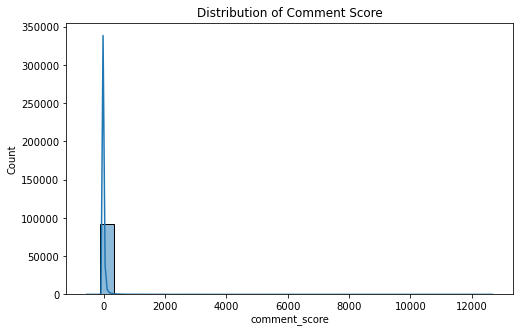

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df["comment_score"], bins=30, kde=True)
plt.title("Distribution of Comment Score")
plt.show()

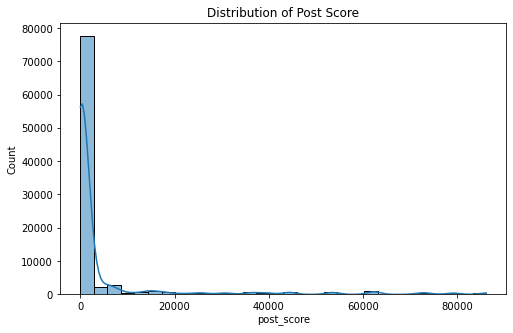

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df["post_score"], bins=30, kde=True)
plt.title("Distribution of Post Score")
plt.show()

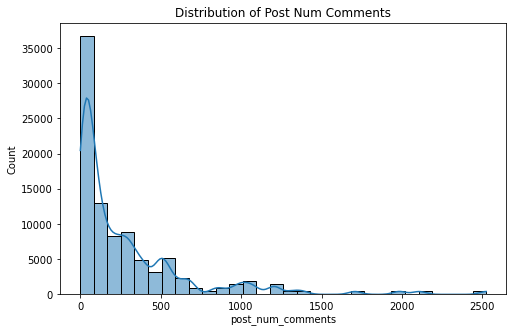

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df["post_num_comments"], bins=30, kde=True)
plt.title("Distribution of Post Num Comments")
plt.show()

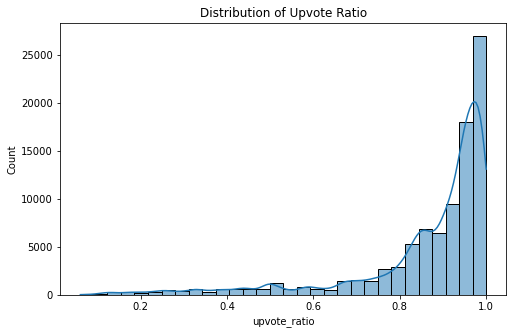

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df["upvote_ratio"], bins=30, kde=True)
plt.title("Distribution of Upvote Ratio")
plt.show()

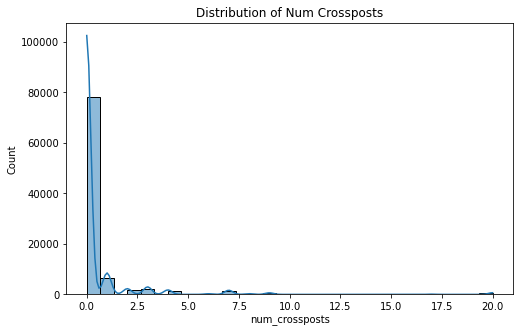

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df["num_crossposts"], bins=30, kde=True)
plt.title("Distribution of Num Crossposts")
plt.show()

c:\Users\user\anaconda3\New folder\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


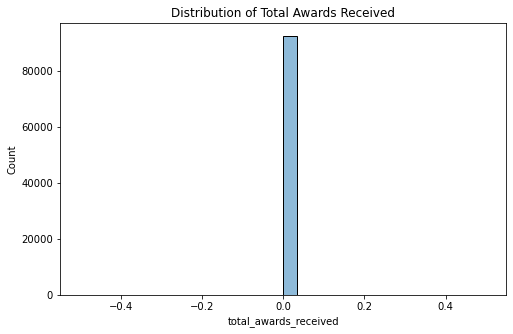

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df["total_awards_received"], bins=30, kde=True)
plt.title("Distribution of Total Awards Received")
plt.show()

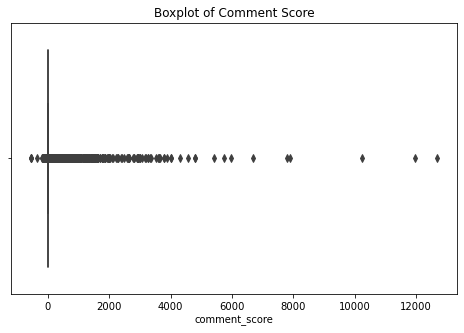

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["comment_score"])
plt.title("Boxplot of Comment Score")
plt.show()

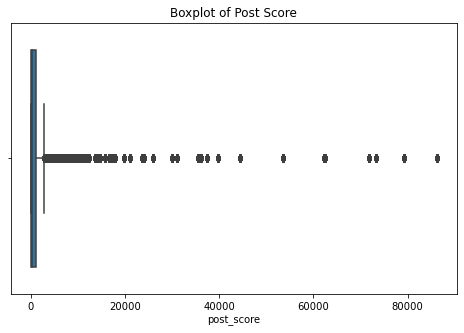

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["post_score"])
plt.title("Boxplot of Post Score")
plt.show()

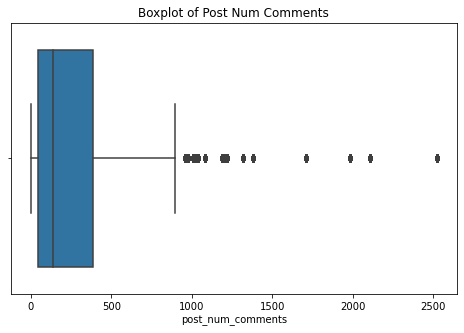

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["post_num_comments"])
plt.title("Boxplot of Post Num Comments")
plt.show()

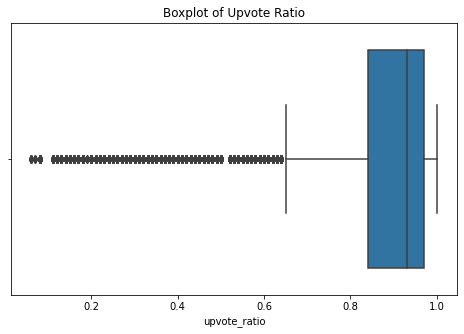

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["upvote_ratio"])
plt.title("Boxplot of Upvote Ratio")
plt.show()

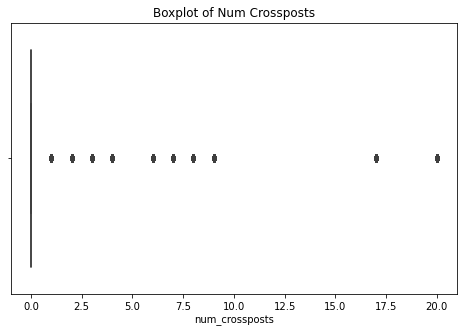

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["num_crossposts"])
plt.title("Boxplot of Num Crossposts")
plt.show()

In [25]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Drop duplicate rows if any
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows dropped.")

# Verify handling of missing values
print("Missing values after initial handling:")
print(df.isnull().sum())

# Convert data types if necessary
df['created'] = pd.to_datetime(df['created'], unit='s')
df['post_created'] = pd.to_datetime(df['post_created'], unit='s')

# Outlier detection using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    outliers = detect_outliers(df, column)
    print(f"Number of outliers in {column}: {len(outliers)}")

# Feature engineering: Example - Length of post_body
df['post_body_length'] = df['post_body'].apply(len)

# Display the first few rows of the updated dataframe
df.head()

Number of duplicate rows: 0
Missing values after initial handling:
title                    0
post_body                0
comment_body             0
comment_score            0
post_url                 0
created                  0
subreddit                0
label                    0
post_score               0
post_num_comments        0
author                   0
comment_author           0
post_created             0
upvote_ratio             0
over_18                  0
is_self_post             0
author_premium           0
all_awardings            0
num_crossposts           0
total_awards_received    0
post_thumbnail           0
post_id                  0
comment_id               0
dtype: int64
Number of outliers in comment_score: 14907
Number of outliers in post_score: 14780
Number of outliers in post_num_comments: 7734
Number of outliers in upvote_ratio: 9365
Number of outliers in num_crossposts: 14464
Number of outliers in total_awards_received: 0


,title,post_body,comment_body,comment_score,post_url,created,subreddit,label,post_score,post_num_comments,...,over_18,is_self_post,author_premium,all_awardings,num_crossposts,total_awards_received,post_thumbnail,post_id,comment_id,post_body_length
0,I don't know what's wrong with me,I'm finding it really hard to keep myself toge...,Have you got a therapist on board? Sounds like...,2,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 17:57:17,mentalhealth,mental_health_issue,1,1,...,False,True,False,[],0,0,self,1ghb2bs,luw5fgj,808
1,Friends who distance themselves from you or cu...,Please tell me if I sound entitled or selfish....,"I think it’s a combination of factors, and I s...",2,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 16:51:51,mentalhealth,mental_health_issue,1,1,...,False,True,False,[],0,0,self,1gh9prb,luvspbv,674
2,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,"When I have a panic attack, I tend to think th...",1,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 18:36:14,mentalhealth,mental_health_issue,2,2,...,False,True,False,[],0,0,self,1gh98yg,luwcwu7,1839
3,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,Im wondering if it was simply a panic attack. ...,2,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 18:45:26,mentalhealth,mental_health_issue,2,2,...,False,True,False,[],0,0,self,1gh98yg,luwep2n,1839
4,Need objective support. I’m in over my head,I feel in over my head and I’m not sure what t...,Please consider seeing a psychologist. Good luck!,1,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 15:59:32,mentalhealth,mental_health_issue,1,4,...,False,True,False,[],0,0,self,1gh8q6w,luvir86,2190


In [26]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for column in numerical_columns:
    df = remove_outliers(df, column)

df.shape  # Check the new shape of the dataframe after removing outliers

(51516, 24)

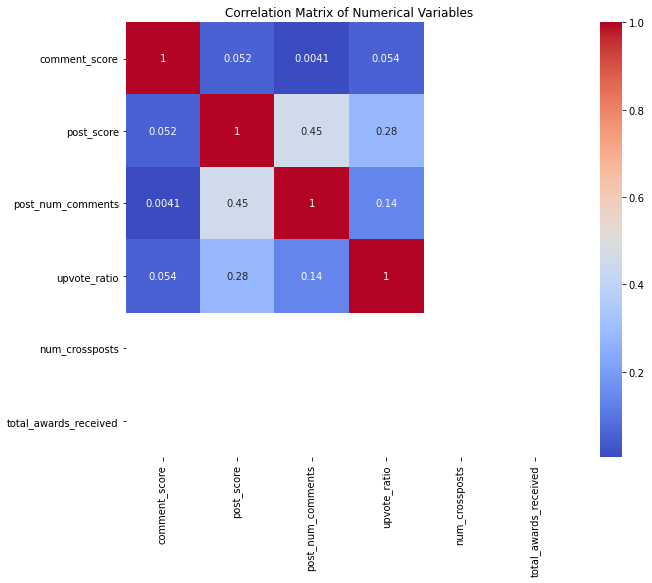

,title,post_body,comment_body,comment_score,post_url,created,subreddit,label,post_score,post_num_comments,...,is_self_post,author_premium,all_awardings,num_crossposts,total_awards_received,post_thumbnail,post_id,comment_id,post_body_length,score_upvote_interaction
0,I don't know what's wrong with me,I'm finding it really hard to keep myself toge...,Have you got a therapist on board? Sounds like...,0.015634,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 17:57:17,mentalhealth,mental_health_issue,-0.650328,-0.932496,...,True,False,[],0.0,0.0,self,1ghb2bs,luw5fgj,808,-0.698722
1,Friends who distance themselves from you or cu...,Please tell me if I sound entitled or selfish....,"I think it’s a combination of factors, and I s...",0.015634,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 16:51:51,mentalhealth,mental_health_issue,-0.650328,-0.932496,...,True,False,[],0.0,0.0,self,1gh9prb,luvspbv,674,-0.698722
2,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,"When I have a panic attack, I tend to think th...",-0.577451,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 18:36:14,mentalhealth,mental_health_issue,-0.647676,-0.927128,...,True,False,[],0.0,0.0,self,1gh98yg,luwcwu7,1839,-0.695873
3,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,Im wondering if it was simply a panic attack. ...,0.015634,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 18:45:26,mentalhealth,mental_health_issue,-0.647676,-0.927128,...,True,False,[],0.0,0.0,self,1gh98yg,luwep2n,1839,-0.695873
4,Need objective support. I’m in over my head,I feel in over my head and I’m not sure what t...,Please consider seeing a psychologist. Good luck!,-0.577451,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 15:59:32,mentalhealth,mental_health_issue,-0.650328,-0.916392,...,True,False,[],0.0,0.0,self,1gh8q6w,luvir86,2190,-0.698722


In [27]:
# Normalization/Standardization
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Feature Engineering: Example - Interaction term between post_score and upvote_ratio
df['score_upvote_interaction'] = df['post_score'] * df['upvote_ratio']

# Display the first few rows of the updated dataframe
df.head()

In [28]:
# Check for numerical variables in the dataframe
all_numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("All numerical columns:", all_numerical_columns)
# Check if the dataframe is ready for modeling using numerical variables
ready_for_modeling = all(df[all_numerical_columns].notnull().all())
print("Ready for modeling with numerical variables:", ready_for_modeling)

All numerical columns: Index(['comment_score', 'post_score', 'post_num_comments', 'upvote_ratio',
       'num_crossposts', 'total_awards_received', 'post_body_length',
       'score_upvote_interaction'],
      dtype='object')
Ready for modeling with numerical variables: True


In [29]:
import re
import string

# Define the cleaning function with added handling for non-string values
def clean_text(text):
    if isinstance(text, str):  # Only clean if the value is a string
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
        text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
        text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
        text = re.sub(r'\n', '', text)  # Remove line breaks
        text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

# Apply the cleaning function to the correct column
df['cleaned_text'] = df['post_body'].apply(clean_text)  # Replace 'post_body' with the correct column name

# Check the cleaned text
df.head()

,title,post_body,comment_body,comment_score,post_url,created,subreddit,label,post_score,post_num_comments,...,author_premium,all_awardings,num_crossposts,total_awards_received,post_thumbnail,post_id,comment_id,post_body_length,score_upvote_interaction,cleaned_text
0,I don't know what's wrong with me,I'm finding it really hard to keep myself toge...,Have you got a therapist on board? Sounds like...,0.015634,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 17:57:17,mentalhealth,mental_health_issue,-0.650328,-0.932496,...,False,[],0.0,0.0,self,1ghb2bs,luw5fgj,808,-0.698722,im finding it really hard to keep myself toget...
1,Friends who distance themselves from you or cu...,Please tell me if I sound entitled or selfish....,"I think it’s a combination of factors, and I s...",0.015634,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 16:51:51,mentalhealth,mental_health_issue,-0.650328,-0.932496,...,False,[],0.0,0.0,self,1gh9prb,luvspbv,674,-0.698722,please tell me if i sound entitled or selfishi...
2,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,"When I have a panic attack, I tend to think th...",-0.577451,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 18:36:14,mentalhealth,mental_health_issue,-0.647676,-0.927128,...,False,[],0.0,0.0,self,1gh98yg,luwcwu7,1839,-0.695873,does anyone else ever get like this or have an...
3,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,Im wondering if it was simply a panic attack. ...,0.015634,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 18:45:26,mentalhealth,mental_health_issue,-0.647676,-0.927128,...,False,[],0.0,0.0,self,1gh98yg,luwep2n,1839,-0.695873,does anyone else ever get like this or have an...
4,Need objective support. I’m in over my head,I feel in over my head and I’m not sure what t...,Please consider seeing a psychologist. Good luck!,-0.577451,https://www.reddit.com/r/mentalhealth/comments...,2024-11-01 15:59:32,mentalhealth,mental_health_issue,-0.650328,-0.916392,...,False,[],0.0,0.0,self,1gh8q6w,luvir86,2190,-0.698722,i feel in over my head and i’m not sure what t...


In [30]:
#fillING the missing values (NaN) in the post_body column with a placeholder string (e.g., "No content available") before applying the cleaning function:
# Fill missing values with a placeholder
df['post_body'] = df['post_body'].fillna('No content available')

# Apply the cleaning function
df['cleaned_text'] = df['post_body'].apply(clean_text)

In [31]:
# Text Cleaning
# The following code cleans the post_body column and saves it as cleaned_text:
import re

# Define the text cleaning function
def clean_text(text):
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning to create 'cleaned_text' column based on 'post_body'
df['cleaned_text'] = df['post_body'].apply(clean_text)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the cleaned text data
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert the TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names())

# Display the first few rows of the TF-IDF DataFrame
tfidf_df.head()

,aa,abandoned,abandonment,abilify,abilities,ability,able,abortion,abroad,absence,...,youve,yr,yrs,zach,zero,zipperup,zoloft,zone,zones,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.062546,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.062546,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


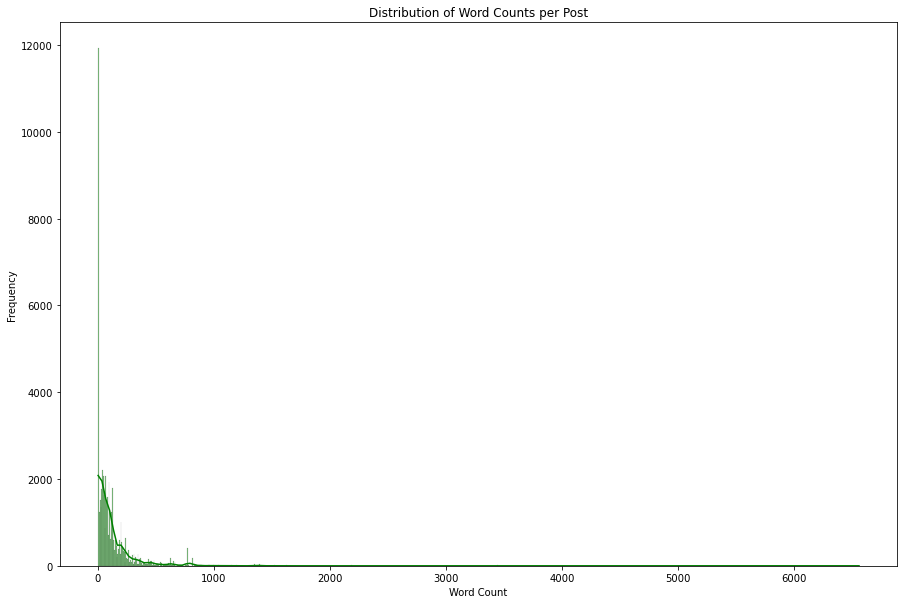

In [33]:
# Calculate word counts
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Plot word count distribution
plt.figure(figsize=(15, 10))
sns.histplot(df['word_count'], kde=True, color='green')
plt.title('Distribution of Word Counts per Post')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Combine TF-IDF features with numerical features
combined_features = pd.concat([tfidf_df, df[all_numerical_columns].reset_index(drop=True)], axis=1)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the target variable and features
X = combined_features
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9980590062111802
Classification Report:
                     precision    recall  f1-score   support

              happy       1.00      1.00      1.00      3053
mental_health_issue       0.99      1.00      1.00      1215
            neutral       1.00      1.00      1.00      6036

           accuracy                           1.00     10304
          macro avg       1.00      1.00      1.00     10304
       weighted avg       1.00      1.00      1.00     10304

